# introduction 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys 
from sklearn.impute import SimpleImputer
import random
from plotly.offline import iplot
from plotnine import ggplot, aes, geom_line, geom_bar, geom_point, labs, coord_flip, theme_xkcd, geom_smooth
import json 
import warnings 


# Introduction 
This project aims to explore the topic of climate change and show the corralations between CO2 levels polar ice and rainfall as the key variables, This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

# polar ice

In [4]:
seaice = pd.read_csv('data/seaice.csv') #reading in the seaice dataset


In [5]:
seaice.info() #checking the info on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26354 entries, 0 to 26353
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          26354 non-null  int64  
 1    Month        26354 non-null  int64  
 2    Day          26354 non-null  int64  
 3        Extent   26354 non-null  float64
 4       Missing   26354 non-null  float64
 5    Source Data  26354 non-null  object 
 6   hemisphere    26354 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


In [6]:
southern = seaice[seaice.iloc[:,6]=='south'] #taking only the information from the south hempisphere

In [7]:
years_list = list(southern['Year'].value_counts().index)
years_list = sorted(years_list)

In [8]:

warnings.simplefilter(action='ignore')
def by_months(southern):    
    s_months = 3 + ((2019-1979) * 12) + 5 
    seaice_monthly = pd.DataFrame(columns=['Year', 'Month', 'Extent'], index=range(s_months))
    i = 0
    for year in years_list:
        
        if year == 1978:
            months_list = range(10,13)
        elif year == 2019:
            months_list = range(1,6)
        else:
            months_list = range(1,13)

        for month in months_list:
            subset = southern[southern['Year']==year][southern.iloc[:,1]==month]
            monthly_mean = np.mean(subset.iloc[:,3])
            seaice_monthly.iloc[i] = [year, month, monthly_mean]
            i += 1

    return seaice_monthly

seaice_clean = by_months(southern)

In [9]:
seaice_clean.head()

,Year,Month,Extent
0,1978,10,17.699
1,1978,11,15.8964
2,1978,12,10.39525
3,1979,1,5.4022
4,1979,2,3.141071


In [10]:
seaice_clean.tail()

,Year,Month,Extent
483,2019,1,3.831323
484,2019,2,2.656214
485,2019,3,3.164161
486,2019,4,5.708633
487,2019,5,8.835516


In [11]:
def anomaliesSIE(seaice):
  #Calcule mean by months from 1981-2010
  df_30y = seaice.query('1981 <= Year <= 2010')
  df_30y = df_30y.reset_index().drop(['index'], axis=1)
  mean_30y = []
  for m in range(1,13):
    mu = seaice[seaice.Month == m]['Extent'].mean()
    mean_30y.append(mu)

  #Compute SIE anomalies
  anomalies_list = []
  for s in range(0, len(seaice)):
    mean_30y_index = seaice.loc[s, 'Month']-1
    #Calcule anomalies
    anomalies_SIE = seaice.loc[s, 'Extent'] - mean_30y[mean_30y_index]
    anomalies_SIE = anomalies_SIE/mean_30y[mean_30y_index]*100
    #Save anomalies
    anomalies_list.append(anomalies_SIE)
  seaice['AnomaliesSIE'] = anomalies_list
  return seaice, mean_30y

df_SIE, mean_30y = anomaliesSIE(seaice_clean)
df_SIE.head()

,Year,Month,Extent,AnomaliesSIE
0,1978,10,17.699,-2.349663
1,1978,11,15.8964,0.285111
2,1978,12,10.39525,-0.402900
3,1979,1,5.4022,8.505038
4,1979,2,3.141071,2.580231


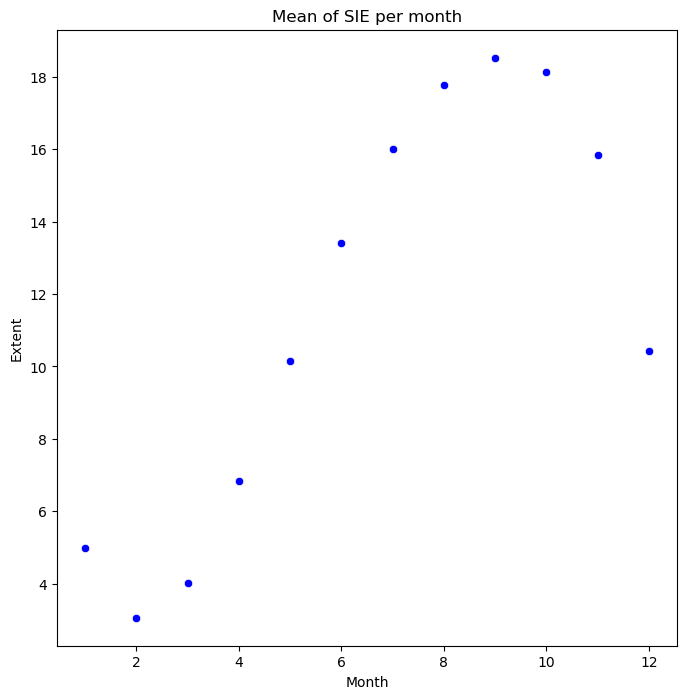

In [12]:
mean_years = []
std_dict = {}
for m in range(1,13):
  #Calcule mu and std values
  mu = seaice_clean[seaice_clean.Month == m]['Extent'].mean()
  std = seaice_clean[seaice_clean.Month == m]['Extent'].std()
  #Save mu and std values
  mean_years.append(mu)
  std_dict[m] = std
df_mean_years = pd.DataFrame(mean_years)
df_mean_years['Month'] = range(1, 13)
df_mean_years.columns = ['Extent', 'Month']
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Month', y='Extent', data=df_mean_years,  color='blue', sizes=20).set(title='Mean of SIE per month')
plt.show()

# rainfall in Ireland 

In [13]:
Irish_rainfall = pd.read_csv('data/rainfall_ireland.csv') #loading in dataset 

In [14]:
Irish_rainfall.head() # looking at the start of the dataset

,Year,Month,Rainfall
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6


In [15]:
Irish_rainfall.tail() # looking at the end of dataset

,Year,Month,Rainfall
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0
3671,2016,12,92.1


In [16]:
Irish_rainfall.info() #seeing information on the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      3672 non-null   int64  
 1   Month     3672 non-null   int64  
 2   Rainfall  3672 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 86.2 KB


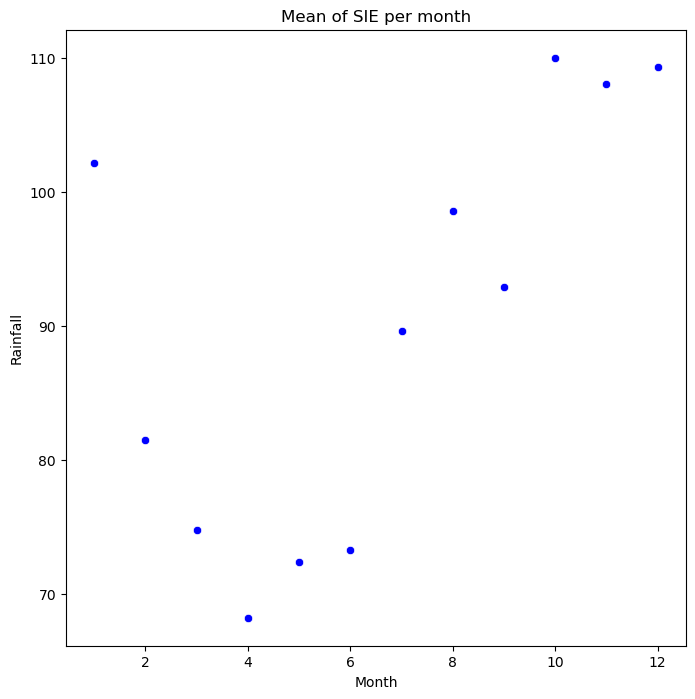

In [17]:
mean_years = []
std_dict = {}
for m in range(1,13):
  #Calcule mu and std values
  mu = Irish_rainfall[Irish_rainfall.Month == m]['Rainfall'].mean()
  std = Irish_rainfall[Irish_rainfall.Month == m]['Rainfall'].std()
  #Save mu and std values
  mean_years.append(mu)
  std_dict[m] = std
df_mean_years = pd.DataFrame(mean_years)
df_mean_years['Month'] = range(1, 13)
df_mean_years.columns = ['Rainfall', 'Month']
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Month', y='Rainfall', data=df_mean_years,  color='blue', sizes=20).set(title='Mean of SIE per month')
plt.show()

In [18]:
mauna_loa_data = pd.read_csv('data/mlo_data.csv',
                             skiprows = [i for i in range(1, 44)])


In [19]:
mauna_loa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    21 non-null     int64  
 1   mean    21 non-null     float64
 2   unc     21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 636.0 bytes


In [20]:
mauna_loa_data.head()

,year,mean,unc
0,2002,373.45,0.12
1,2003,375.98,0.12
2,2004,377.70,0.12
3,2005,379.98,0.12
4,2006,382.09,0.12


In [21]:
mauna_loa_data.tail()

,year,mean,unc
16,2018,408.72,0.12
17,2019,411.65,0.12
18,2020,414.21,0.12
19,2021,416.41,0.12
20,2022,418.53,0.12


In [22]:
nature_co2 = pd.read_csv('data/nature.csv')

In [24]:
nature_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1096 non-null   int64  
 1   co2         1096 non-null   float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 68.6 KB


In [26]:
nature_co2.head()

,year,co2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,137,280.4,NaN,NaN,NaN,NaN,NaN,NaN
1,268,274.9,NaN,NaN,NaN,NaN,NaN,NaN
2,279,277.9,NaN,NaN,NaN,NaN,NaN,NaN
3,395,279.1,NaN,NaN,NaN,NaN,NaN,NaN
4,404,281.9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp = pd.read_csv('data/temp_data.csv', encoding='Latin')


In [29]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [30]:
temp.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
